In [ ]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory // 1024**2} MB")
else:
    print("GPU not available - check Runtime > Change runtime type > Hardware accelerator > GPU")

!pip install ultralytics -q

from ultralytics import YOLO
import os
from pathlib import Path
import yaml

PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4
CUDA version: 12.4
GPU Memory: 15095 MB


In [5]:
from google.colab import files
import zipfile
import shutil

print("Upload your dataset...")
print("Options:")
print("1. Upload one ZIP cu train/, valid/, test/, data.yaml")
print("2. Or upload manual each folder")

print("\nUpload ZIP file cu dataset-ul:")
uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('.')
        os.remove(filename)
        print("Dataset extracted!")

def check_dataset_structure():
    required_paths = [
        'train/images', 'train/labels',
        'valid/images', 'valid/labels',
        'test/images', 'test/labels',
        'data.yaml'
    ]

    missing = []
    for path in required_paths:
        if not os.path.exists(path):
            missing.append(path)

    if missing:
        print(f"Missing: {missing}")
        return False
    else:
        print("Dataset structure is correct!")
        return True

check_dataset_structure()

📁 Upload your dataset...
Opțiuni:
1. Upload un ZIP cu train/, valid/, test/, data.yaml
2. Sau upload manual fiecare folder

🗂️ Upload ZIP file cu dataset-ul:


✅ Dataset structure is correct!


True

In [6]:
def analyze_dataset():
    # Count files
    train_imgs = len(list(Path('train/images').glob('*')))
    train_lbls = len(list(Path('train/labels').glob('*')))

    valid_imgs = len(list(Path('valid/images').glob('*')))
    valid_lbls = len(list(Path('valid/labels').glob('*')))

    test_imgs = len(list(Path('test/images').glob('*')))
    test_lbls = len(list(Path('test/labels').glob('*')))

    print("📊 Dataset Statistics:")
    print(f"Train: {train_imgs} images, {train_lbls} labels")
    print(f"Valid: {valid_imgs} images, {valid_lbls} labels")
    print(f"Test: {test_imgs} images, {test_lbls} labels")
    print(f"Total: {train_imgs + valid_imgs + test_imgs} images")

    # Check data.yaml
    with open('data.yaml', 'r') as f:
        data_config = yaml.safe_load(f)

    print(f"\nClasses: {data_config['names']}")
    print(f"Number of classes: {data_config['nc']}")

    sample_labels = list(Path('train/labels').glob('*.txt'))[:3]
    print(f"\nSample labels:")
    for label_file in sample_labels:
        print(f"  {label_file.name}:")
        with open(label_file, 'r') as f:
            content = f.read().strip()
            if content:
                print(f"    {content}")
            else:
                print("    (empty)")

    return train_imgs > 0

analyze_dataset()

📊 Dataset Statistics:
Train: 3006 images, 3006 labels
Valid: 329 images, 329 labels
Test: 186 images, 186 labels
Total: 3521 images

🏷️ Classes: ['Mobile-phone']
Number of classes: 1

📄 Sample labels:
  b11762f8d1807d79_jpg.rf.2518947535fa4e5d642a178abb24c202.txt:
    0 0.5034375 0.361856 0.6018749999999999 0.48876
  0a82c025303de441_jpg.rf.5ef830ed3dc7a98778a75abd1f37a7b8.txt:
    0 0.095361328125 0.22860632183908047 0.156748046875 0.415933908045977
  93363ec2e692d863ce3ae12f42a035ba_jpeg.rf.6e9bac9bdeee81d8113d34eb77976b9e.txt:
    0 0.2923577235772358 0.2951582867783985 0.0826829268292683 0.08379888268156424
0 0.5410894308943089 0.5148975791433892 0.06307317073170732 0.061452513966480445
0 0.2248780487804878 0.515828677839851 0.2176422764227642 0.24208566108007448
0 0.5622276422764227 0.7188081936685289 0.10533333333333333 0.2085661080074488


True

In [1]:
from ultralytics import YOLO
import torch

config = {
    'data': 'data.yaml',
    'epochs': 100,
    'batch': 32,
    'imgsz': 640,
    'device': 0,
    'project': 'smartphone_detection',
    'name': 'colab_v1',
    'patience': 20,
    'save_period': 10,
    'workers': 2,
}

print("Starting YOLO training on Colab...")
print(f"Configuration: {config}")

# Load pre-trained model
model = YOLO('yolov8n.pt')

# Start training
results = model.train(
    data=config['data'],
    epochs=config['epochs'],
    batch=config['batch'],
    imgsz=config['imgsz'],
    device=config['device'],
    project=config['project'],
    name=config['name'],
    patience=config['patience'],
    save_period=config['save_period'],
    workers=config['workers'],

    # Enhanced data augmentation
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=15.0,
    translate=0.1,
    scale=0.9,
    shear=2.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mixup=0.2,
    copy_paste=0.3,

    # Optimizer settings
    optimizer='AdamW',
    lr0=0.01,
    lrf=0.1,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,

    # Colab specific
    cache=True,
    rect=True,
    cos_lr=True,
    close_mosaic=10,
)

print("Training completed!")
print(f"Best model: {config['project']}/{config['name']}/weights/best.pt")

🚀 Starting YOLO training on Colab...
Configuration: {'data': 'data.yaml', 'epochs': 100, 'batch': 32, 'imgsz': 640, 'device': 0, 'project': 'smartphone_detection', 'name': 'colab_v1', 'patience': 20, 'save_period': 10, 'workers': 2}
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=15.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n

train: Scanning /content/train/labels... 3006 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3006/3006 [00:01<00:00, 2264.64it/s]

train: New cache created: /content/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.5GB RAM): 100%|██████████| 3006/3006 [00:15<00:00, 199.14it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1289.8±1138.9 MB/s, size: 123.5 KB)


val: Scanning /content/valid/labels... 329 images, 0 backgrounds, 0 corrupt: 100%|██████████| 329/329 [00:00<00:00, 1019.57it/s]

val: New cache created: /content/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 329/329 [00:03<00:00, 93.70it/s] 


Plotting labels to smartphone_detection/colab_v12/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to smartphone_detection/colab_v12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.88G      1.558      2.051        1.9         34        352: 100%|██████████| 94/94 [00:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]


                   all        329        454     0.0126      0.566    0.00965    0.00338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.92G      1.848      2.102      2.209         33        352: 100%|██████████| 94/94 [00:32<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        329        454      0.329      0.115      0.121     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.94G      1.794      2.045      2.173         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]


                   all        329        454     0.0463      0.207     0.0334     0.0103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.95G      1.727      1.959      2.106         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        329        454      0.178      0.317      0.115     0.0403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.97G       1.62      1.818      1.988         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        329        454      0.642      0.466      0.508      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.99G      1.561      1.734      1.932         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        329        454      0.488      0.454      0.444      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         5G      1.489      1.638      1.856         34        352: 100%|██████████| 94/94 [00:33<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        329        454      0.622       0.51      0.524        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.02G      1.443      1.589      1.801         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        329        454      0.497      0.478      0.454      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.04G      1.407      1.561      1.772         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        329        454      0.755      0.566       0.66       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.05G      1.352      1.477      1.708         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        329        454       0.76      0.581      0.683      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.07G      1.333      1.422       1.69         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        329        454      0.684      0.621      0.631      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.09G      1.316      1.387      1.681         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        329        454      0.803      0.623        0.7      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.11G      1.284      1.345      1.657         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        329        454      0.733      0.575      0.642      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.12G      1.301      1.354      1.667         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        329        454      0.739      0.637      0.707      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.14G      1.281      1.313      1.649         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        329        454      0.771      0.637      0.716      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.16G      1.273      1.296      1.631         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        329        454      0.797      0.676      0.764       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.17G      1.247      1.221      1.606         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        329        454      0.746       0.65      0.712      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.19G      1.209      1.193      1.586         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        329        454      0.798      0.681      0.757      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.21G      1.194      1.188      1.561         32        352: 100%|██████████| 94/94 [00:30<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]

                   all        329        454      0.761      0.721      0.788      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.23G       1.17      1.155       1.55         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        329        454      0.833      0.678      0.769      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.24G       1.19      1.165      1.549         33        352: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        329        454      0.812      0.732       0.81       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.26G      1.164      1.144      1.542         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        329        454      0.866      0.738      0.834      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.28G      1.179       1.14      1.547         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        329        454      0.836      0.749      0.808      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.29G      1.162       1.12      1.533         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        329        454      0.849        0.7      0.775      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.31G      1.135      1.104      1.513         32        352: 100%|██████████| 94/94 [00:31<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]

                   all        329        454      0.857      0.728      0.835      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.33G      1.152      1.117      1.515         33        352: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        329        454      0.825       0.72      0.799      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.35G      1.145      1.083       1.52         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]

                   all        329        454       0.85      0.751       0.83      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.36G      1.124      1.073      1.498         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        329        454      0.849      0.758      0.834      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.38G      1.113      1.064      1.491         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        329        454      0.885      0.744      0.846      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       5.4G      1.138      1.073      1.502         33        352: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        329        454      0.881      0.753      0.847       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.42G      1.105      1.079      1.474         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        329        454      0.924      0.744       0.87      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.43G       1.09      1.031      1.462         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        329        454      0.901      0.769      0.869      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.45G       1.08      1.011      1.465         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all        329        454      0.856      0.731      0.833       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.46G      1.096      1.018      1.472         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        329        454      0.903      0.778      0.874       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.48G      1.089      1.005       1.46         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        329        454      0.912      0.714      0.852       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       5.5G      1.092      1.011      1.453         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        329        454      0.892      0.764      0.862      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.52G      1.051     0.9873      1.416         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        329        454      0.891      0.736      0.858      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.53G      1.096     0.9878      1.456         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        329        454      0.903      0.737      0.849       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.55G      1.077     0.9926      1.449         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        329        454      0.843      0.753       0.83      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.57G      1.087     0.9849       1.45         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        329        454      0.854      0.758      0.836      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.58G      1.062     0.9528      1.435         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        329        454      0.908      0.779      0.888      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       5.6G      1.045     0.9362       1.42         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        329        454      0.786      0.749      0.807       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.62G      1.042     0.9481      1.415         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        329        454      0.905      0.778      0.886      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.63G      1.037     0.9262      1.415         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        329        454      0.876      0.732      0.836      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.65G      1.037     0.9423      1.416         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        329        454      0.906      0.782       0.87      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.67G      1.005     0.9084      1.387         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        329        454      0.912       0.78       0.88      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.69G       1.02      0.921      1.399         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]

                   all        329        454      0.875      0.787      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       5.7G      1.034     0.9077      1.388         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        329        454      0.879      0.784      0.876      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.72G     0.9963     0.8779      1.376         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]

                   all        329        454      0.861      0.837      0.894      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.74G      1.002     0.8671      1.376         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        329        454       0.89      0.804      0.897      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.75G      1.004     0.8672      1.394         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        329        454      0.892      0.802      0.884      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.77G     0.9995     0.8562      1.378         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        329        454      0.894      0.817      0.887      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.79G     0.9847     0.8673      1.358         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        329        454       0.88      0.823      0.884      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.81G     0.9839     0.8476      1.361         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        329        454      0.855      0.846      0.894      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.82G     0.9785     0.8457      1.366         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        329        454      0.878      0.822        0.9      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.84G     0.9795     0.8291       1.36         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        329        454      0.912      0.801      0.908      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.86G     0.9544     0.8066      1.348         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        329        454      0.886      0.804        0.9       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.88G     0.9806     0.8211      1.363         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        329        454      0.928      0.792      0.909      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.89G     0.9505     0.7971      1.336         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        329        454      0.894      0.822       0.91      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.91G     0.9469     0.8051       1.33         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        329        454      0.911      0.806      0.902      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.93G      0.946     0.8023      1.319         34        352: 100%|██████████| 94/94 [00:33<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        329        454      0.901       0.83      0.919       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.94G     0.9472     0.7992      1.331         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        329        454      0.904      0.805      0.902      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.96G     0.9538      0.789      1.333         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        329        454      0.865      0.848      0.918      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.97G     0.9358     0.7737      1.322         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        329        454      0.899      0.839      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.99G     0.9299     0.7681      1.317         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        329        454      0.917      0.817      0.925      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.01G     0.9304     0.7731      1.314         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        329        454      0.887      0.851      0.919      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.03G     0.9255     0.7656      1.302         34        352: 100%|██████████| 94/94 [00:33<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        329        454      0.912      0.844      0.921      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.04G     0.9088     0.7443      1.301         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        329        454        0.9      0.852      0.921      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.06G     0.9066     0.7351        1.3         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all        329        454      0.888      0.857      0.924      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.08G     0.9031     0.7388        1.3         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        329        454      0.902      0.856      0.923      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       6.1G     0.9024     0.7322      1.294         33        352: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        329        454      0.921      0.844      0.919      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.11G     0.8917     0.7266      1.277         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        329        454      0.895      0.843       0.92      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.13G      0.888     0.7358       1.28         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        329        454       0.91      0.855      0.925      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.15G     0.8741     0.7196       1.27         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        329        454      0.925      0.846      0.929      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.16G     0.8874     0.7215      1.282         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        329        454      0.927       0.85       0.93      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.18G     0.8596     0.6986      1.265         33        352: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        329        454      0.894      0.876      0.922      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       6.2G     0.8783     0.7027      1.277         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        329        454      0.937      0.835      0.929      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.22G     0.8706     0.7017      1.264         33        352: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        329        454      0.934      0.844      0.925       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.23G      0.873     0.7032      1.266         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        329        454      0.918      0.865      0.928      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.25G     0.8752     0.6977       1.26         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all        329        454      0.901      0.857      0.928      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.27G     0.8624     0.6867       1.26         34        352: 100%|██████████| 94/94 [00:31<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        329        454      0.943      0.824       0.92      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.28G     0.8511     0.6761      1.253         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]

                   all        329        454       0.93      0.844      0.931      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       6.3G     0.8577     0.6766      1.256         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        329        454      0.923      0.852      0.928      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.32G     0.8411     0.6632      1.251         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        329        454      0.931      0.844      0.931      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.33G     0.8575     0.6691      1.256         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        329        454      0.894      0.877      0.928      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.35G     0.8312     0.6587      1.237         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]

                   all        329        454      0.949       0.83      0.931       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.37G     0.8359     0.6722      1.239         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        329        454      0.902      0.867       0.93      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.39G     0.8339      0.656      1.238         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]

                   all        329        454      0.895      0.866      0.928      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       6.4G      0.827     0.6578      1.229         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        329        454      0.941      0.835      0.932      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.42G     0.8338     0.6586      1.233         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        329        454      0.925      0.855      0.934      0.722


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.44G     0.8434     0.6701      1.241         34        352: 100%|██████████| 94/94 [00:33<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]

                   all        329        454      0.888      0.883      0.931      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.45G     0.8316     0.6529      1.226         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        329        454      0.941      0.826      0.933      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.47G      0.835     0.6484      1.245         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        329        454      0.935      0.844      0.934      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.49G     0.8288       0.65       1.23         33        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        329        454      0.916       0.85      0.935      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.51G     0.8276     0.6464      1.228         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        329        454      0.915      0.866      0.935      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.52G     0.8163     0.6373      1.228         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        329        454      0.897      0.879      0.934      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.54G     0.8222     0.6378      1.223         34        352: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        329        454      0.934      0.843      0.933      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.56G     0.8185     0.6367      1.228         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        329        454      0.912       0.87      0.936      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.57G     0.8084     0.6366      1.214         34        352: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        329        454       0.91      0.873      0.938      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.59G     0.7985     0.6265      1.217         34        352: 100%|██████████| 94/94 [00:32<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        329        454      0.911      0.861      0.936      0.731



100 epochs completed in 0.955 hours.
Optimizer stripped from smartphone_detection/colab_v12/weights/last.pt, 6.2MB
Optimizer stripped from smartphone_detection/colab_v12/weights/best.pt, 6.2MB

Validating smartphone_detection/colab_v12/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]


                   all        329        454      0.916       0.85      0.935      0.746
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to smartphone_detection/colab_v12
✅ Training completed!
Best model: smartphone_detection/colab_v1/weights/best.pt


In [ ]:
# Validare pe test set
print("Validating model...")

# Load best model
best_model = YOLO('smartphone_detection/colab_v12/weights/best.pt')

# Validate on test set
test_results = best_model.val(
    data='data.yaml',
    split='test',
    save_json=True,
    conf=0.25,
    iou=0.6,
)

print("Test Results:")
print(f"  mAP50: {test_results.box.map50:.3f}")
print(f"  mAP50-95: {test_results.box.map:.3f}")
print(f"  Precision: {test_results.box.mp:.3f}")
print(f"  Recall: {test_results.box.mr:.3f}")

test_images = list(Path('test/images').glob('*'))[:5]

print(f"\n🔍 Testing on {len(test_images)} sample images:")

for img_path in test_images:
    print(f"\nTesting: {img_path.name}")

    # Run inference
    results = best_model(str(img_path), conf=0.3, save=True)

    # Print results
    if len(results[0].boxes) > 0:
        for box in results[0].boxes:
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            print(f"  Detected smartphone: {conf:.3f} confidence")
    else:
        print(f"  No smartphone detected")

Validating model...


NameError: name 'YOLO' is not defined

📈 Training Results:


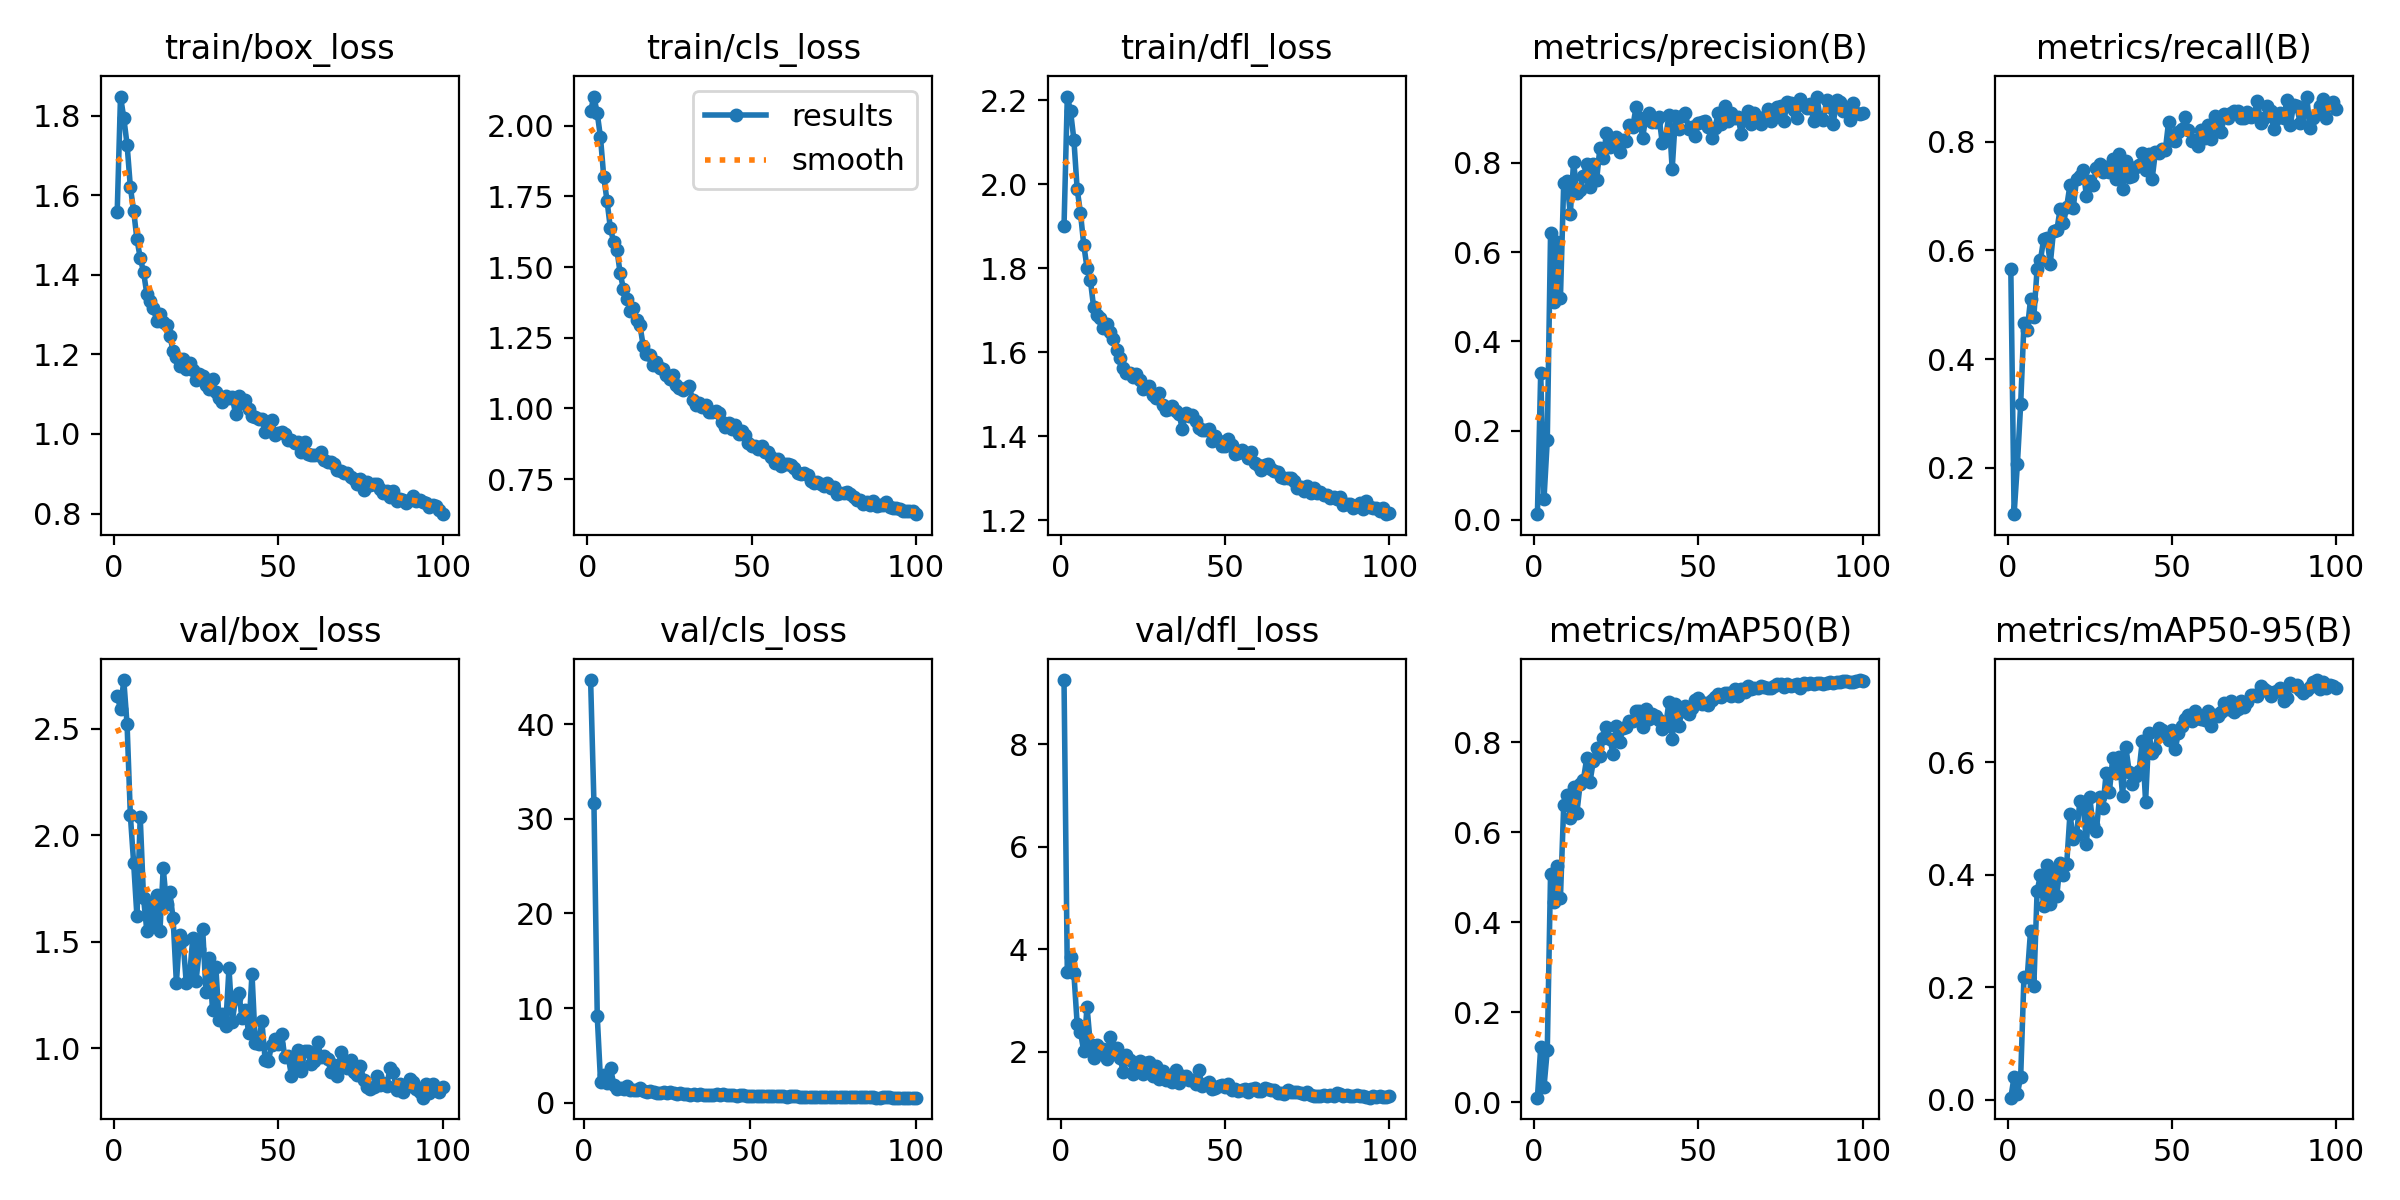


🎯 Confusion Matrix:


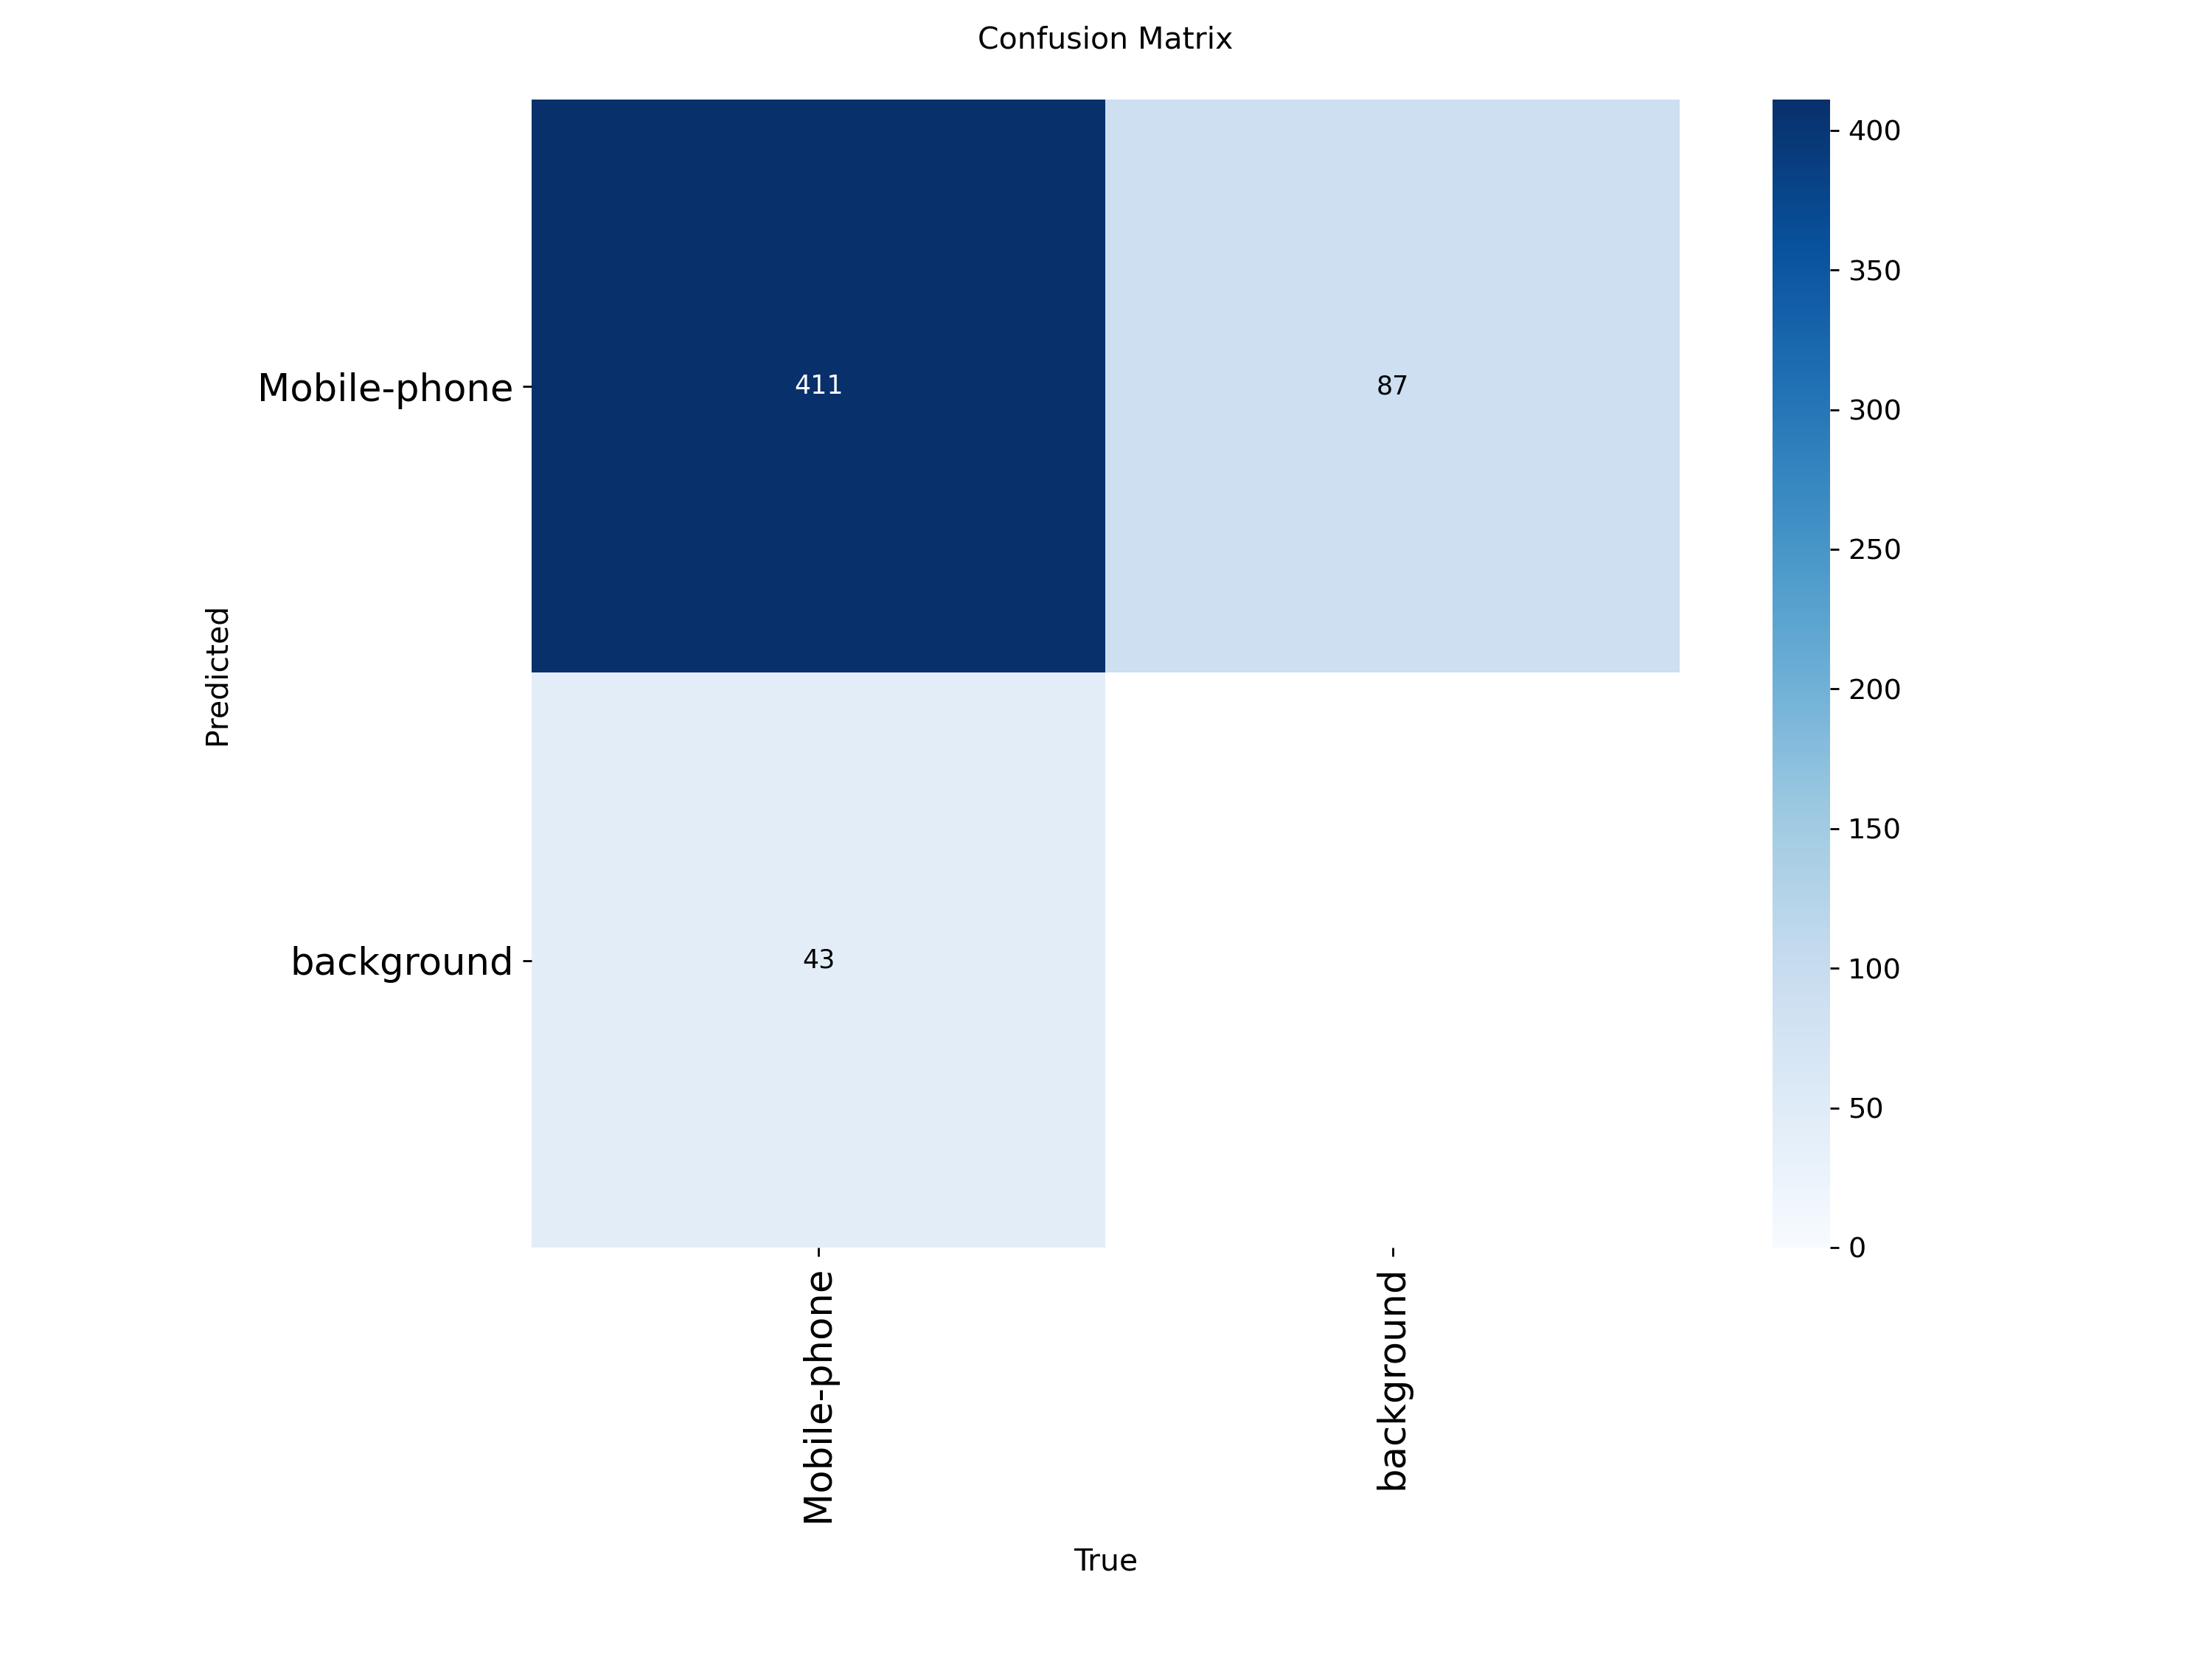


🔍 Sample Predictions:


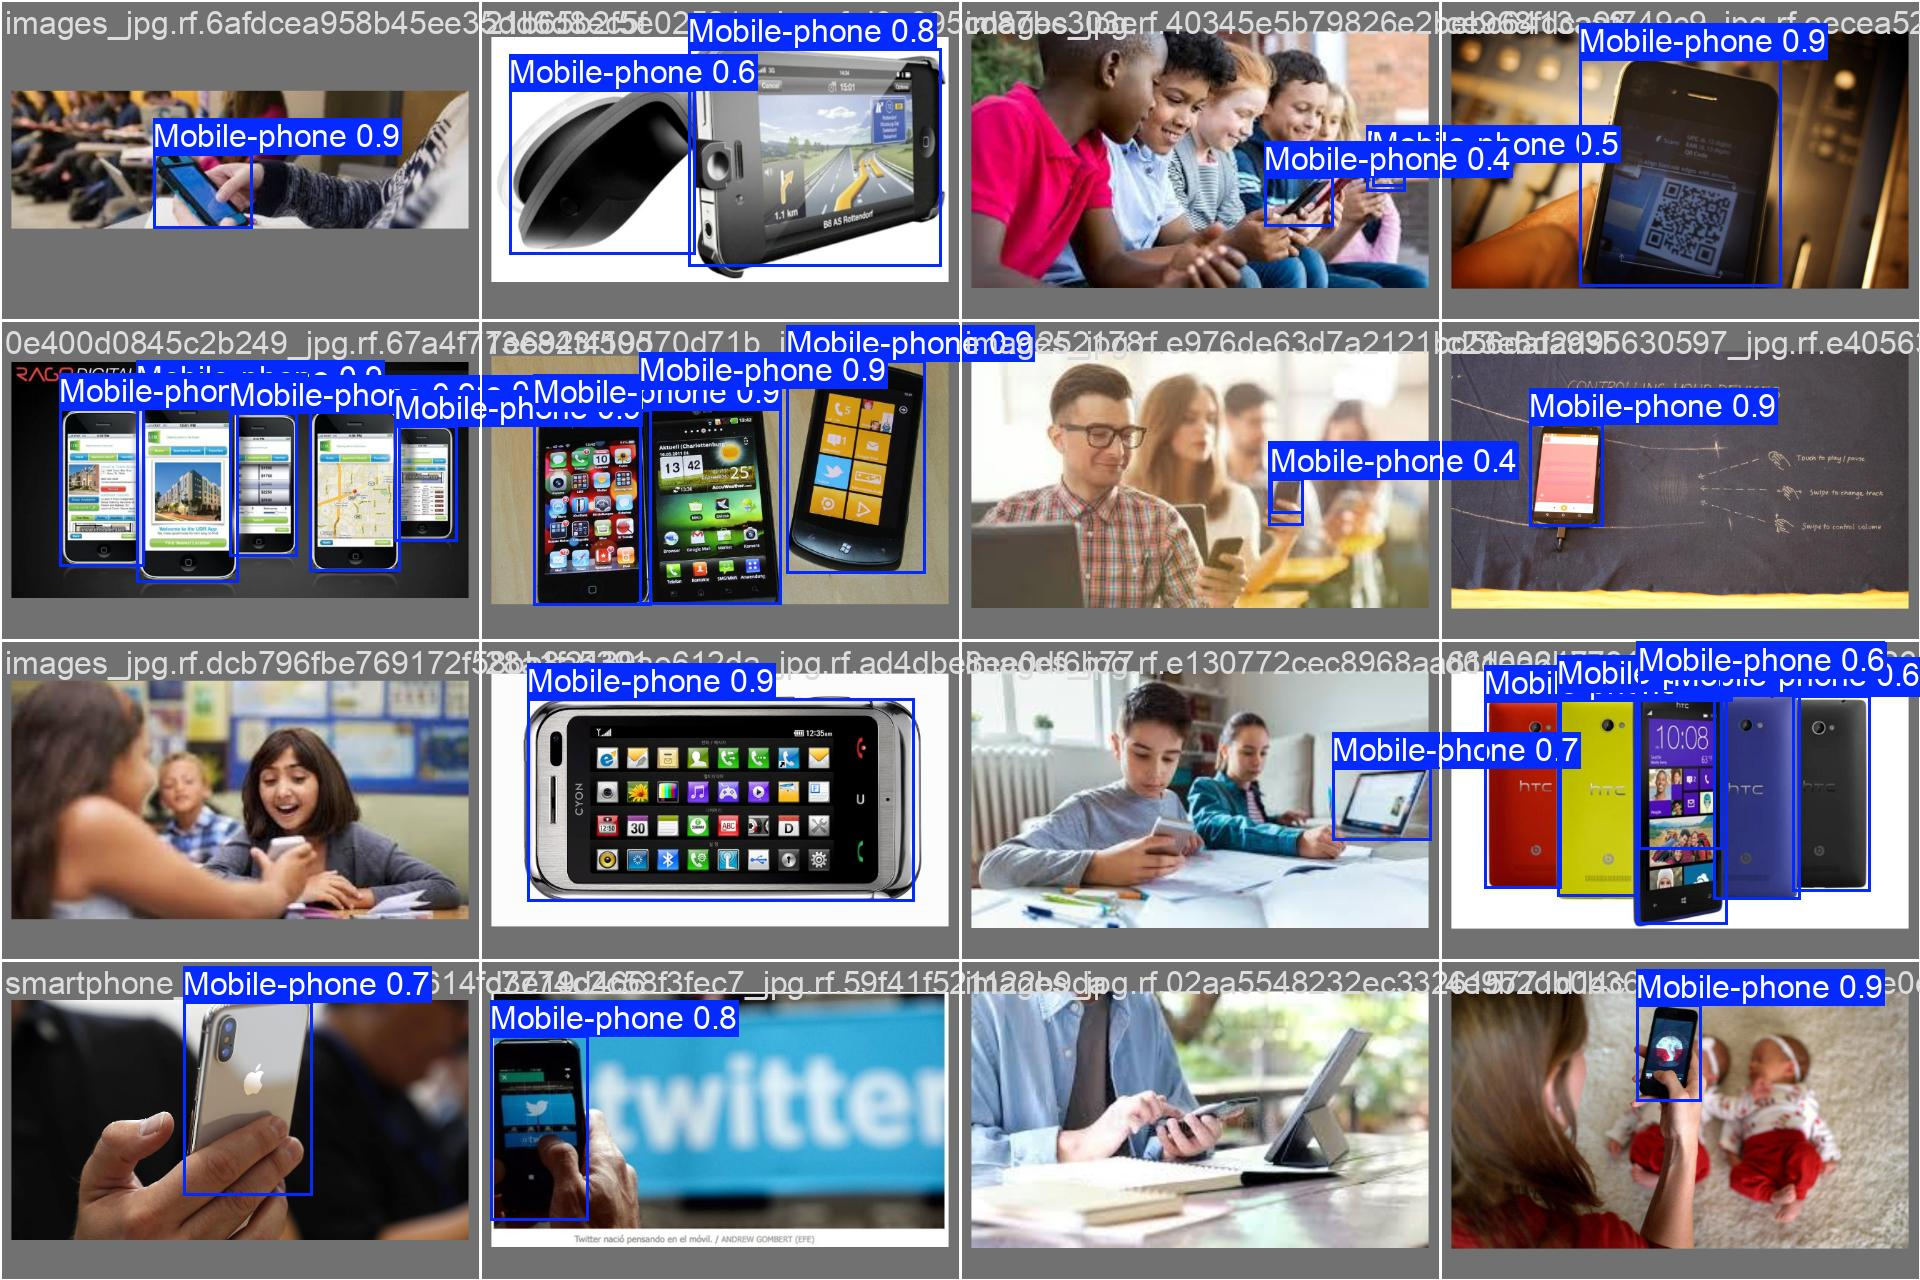

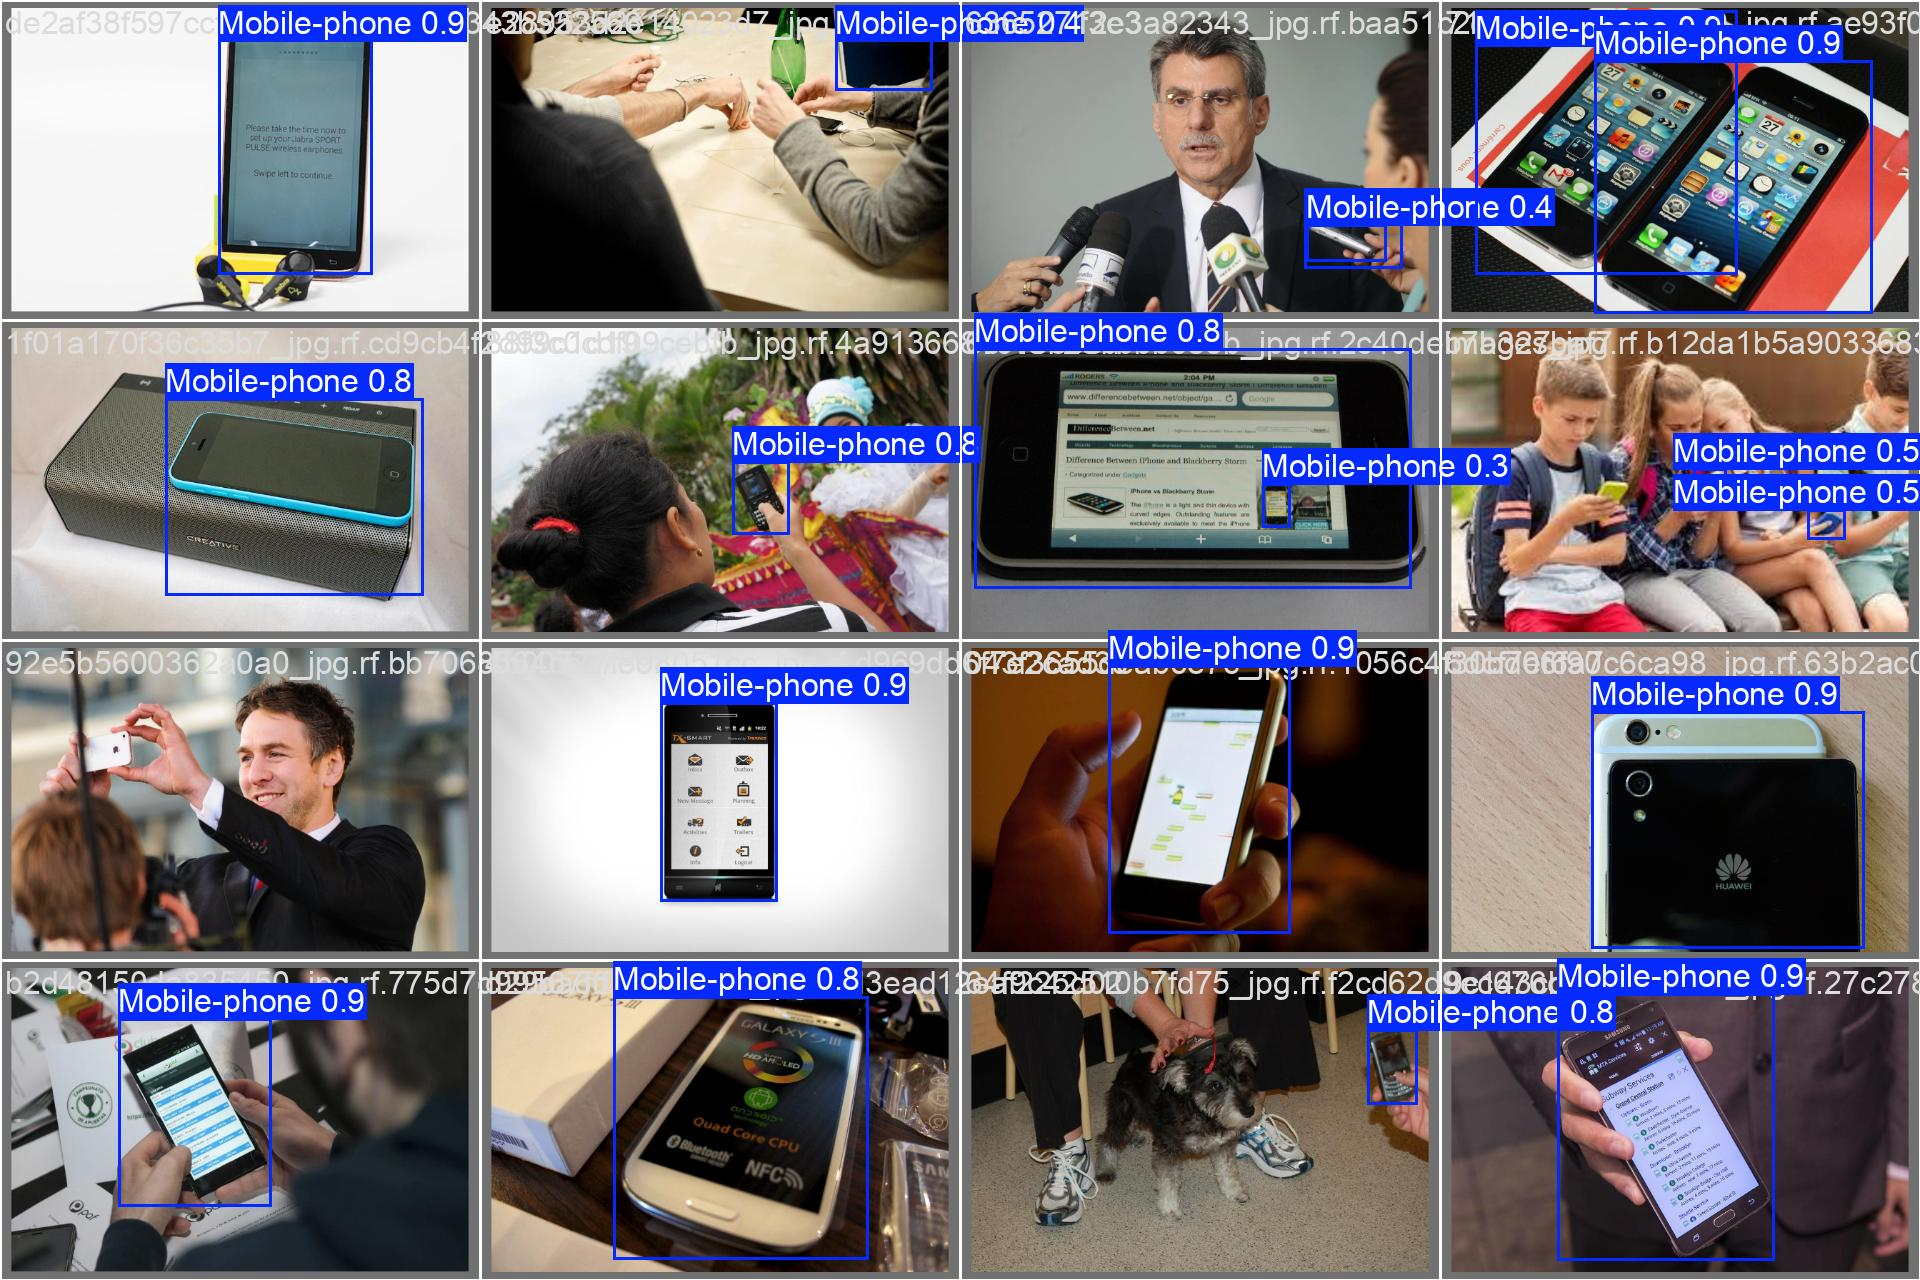

In [8]:
# Vizualizare training curves și rezultate
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob

# Training curves
results_dir = 'smartphone_detection/colab_v12'

# Afișează rezultatele
if os.path.exists(f'{results_dir}/results.png'):
    print("📈 Training Results:")
    display(Image(f'{results_dir}/results.png'))

# Confusion matrix
if os.path.exists(f'{results_dir}/confusion_matrix.png'):
    print("\n🎯 Confusion Matrix:")
    display(Image(f'{results_dir}/confusion_matrix.png'))

# Sample predictions
pred_images = glob.glob(f'{results_dir}/val_batch*_pred.jpg')
if pred_images:
    print(f"\n🔍 Sample Predictions:")
    for img_path in pred_images[:2]:
        display(Image(img_path))

In [9]:
from google.colab import files
import shutil

shutil.make_archive('smartphone_model', 'zip', 'smartphone_detection/colab_v12')

print("Downloading trained model and results...")

files.download('smartphone_model.zip')

files.download('smartphone_detection/colab_v12/weights/best.pt')

print("Download complete!")
print("Files downloaded:")
print("  - smartphone_model.zip (complete results)")
print("  - best.pt (trained model)")

📦 Downloading trained model and results...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download complete!
📁 Files downloaded:
  - smartphone_model.zip (complete results)
  - best.pt (trained model)
